1 Introduction

In this kernel we are going to perform a statistical text analysis on the Star Wars scripts from The Original Trilogy Episodes (IV, V and VI), using wordclouds to show the most frequent words. The input files used for the analysis are avaliable here. This post is my particular tribute to the Star Wars Day, on May 4.

2 Loading data

In [8]:
# Load libraries
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import os
from os import path
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
from collections import OrderedDict, defaultdict, Counter
import pandas as pd
import csv
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
import tokenize
from nltk.tokenize import word_tokenize
from tokenize import tokenize
import itertools
from PIL import Image
from wordcloud import WordCloud
#from ggplot import *

# Read the data
ep4_file = r"C:\\Users\\kahma\\Downloads\\star-wars-movie-scripts\\star-wars-movie-scripts\\SW_EpisodeIV.txt"
ep5_file = r"C:\\Users\\kahma\\Downloads\\star-wars-movie-scripts\\star-wars-movie-scripts\\SW_EpisodeV.txt"
ep6_file = r"C:\\Users\\kahma\\Downloads\\star-wars-movie-scripts\\star-wars-movie-scripts\\SW_EpisodeVI.txt"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kahma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


3 Functions

The first function performs cleaning and preprocessing steps to a corpus:
str.replace('[^\w\s]',''). Remove all punctuation marks
str.replace('  ', ''). Remove excess whitespace
lambda x: x.lower(). Make all characters lowercase
lambda x: ' '.join(item for item in x if item not in new_stopwords_list)). Remove some common English stop words (“I”, “she’ll”, “the”, etc.)
str.replace('\d+', ''). Remove numbers

In [9]:
# Text transformations
def cleancorpus(txtfile):

    stop_words = set(stopwords.words('english'))
    # add words that aren't in the NLTK stopwords list
    new_stopwords = ['thats','weve','hes','theres','ive','im','will','can','cant','dont','youve','us'
        ,'youre','youll','theyre','whats','didnt']
    new_stopwords_list = stop_words.union(new_stopwords)
    data1 = pd.read_csv(txtfile, delimiter='|')
    pd.set_option('max_colwidth', 200)
    data1["dialogue"] = data1["dialogue"].str.replace('[^\w\s]','')
    data1.dialogue = data1.dialogue.apply(lambda x: x.lower())
    data1.dialogue = data1.dialogue.str.replace('\d+', '')
    data1.dialogue = data1.dialogue.str.split().apply\
        (lambda x: ' '.join(item for item in x if item not in new_stopwords_list))
    data1.dialogue = data1.dialogue.str.replace('  ', '')
    #print(data1.dialogue.head(120))
    #print(data.dialogue)
    return data1

The second function constructs the term-document matrix, that describes the frequency of terms that occur in a collection of documents. This matrix has terms in the first column and documents across the top as individual column names.

In [10]:
def get_top_n_words(corpus):
    word_list = []
    dialogue_list = pd.Series(corpus['dialogue'])
    dialogue_list_temp = dialogue_list.tolist()
    for stat in dialogue_list_temp:
        word_list.extend(stat.split())
    word_series = pd.Series(word_list)
    return word_series.value_counts()

The next two functions extract tokens containing two words.

In [11]:
# Define bigram tokenizer 
def bigrams_calculate(bigramfile):
    i = cleancorpus(bigramfile).dialogue \
        .str.split(expand=True) \
        .stack()
    j = i + ' ' + i.shift(-1)
    bigrams = j.dropna().reset_index(drop=True)
    return bigrams

In [12]:
# Most frequent bigrams
def most_frequent_bigrams(freq_bigrams):
    bigrams_list = pd.Series(freq_bigrams)
    count_bigrams = bigrams_list.value_counts().head(20)
    return count_bigrams

4 Episode IV: A New Hope

In [13]:
# How many dialogues?
print('Total Dialogues in Episode 4- A New Hope:', len(cleancorpus(ep4_file).dialogue), '\n')

Total Dialogues in Episode 4- A New Hope: 1010 



In [14]:
# How many characters?
print('Total Characters in Episode 4- A New Hope:', len(cleancorpus(ep4_file).character.unique()), '\n')

Total Characters in Episode 4- A New Hope: 60 



In [15]:
def seriestodf(series):
    df_temp = pd.DataFrame(series)
    df_temp.reset_index(inplace=True)
    df_temp.columns = ('Character', 'Dialogue')
    return df_temp


def seriestodfbigram(series):
    df_temp = pd.DataFrame(series)
    df_temp.reset_index(inplace=True)
    df_temp.columns = ('Bigram', 'Frequency')
    return df_temp

Top20Chars_ep4 = cleancorpus(ep4_file).character.value_counts().head(20)
Top20Chars_ep5 = cleancorpus(ep5_file).character.value_counts().head(20)
Top20Chars_ep6 = cleancorpus(ep6_file).character.value_counts().head(20)

df_ep4 = seriestodf(Top20Chars_ep4)
df_ep5 = seriestodf(Top20Chars_ep5)
df_ep6 = seriestodf(Top20Chars_ep6)
df_ep4_bigram = seriestodfbigram(most_frequent_bigrams(bigrams_calculate(ep4_file)))
df_ep5_bigram = seriestodfbigram(most_frequent_bigrams(bigrams_calculate(ep5_file)))
df_ep6_bigram = seriestodfbigram(most_frequent_bigrams(bigrams_calculate(ep6_file)))

LUKE              254
HAN               153
THREEPIO          119
BEN                82
LEIA               57
VADER              41
RED LEADER         37
BIGGS              34
TARKIN             28
OWEN               25
TROOPER            19
WEDGE              14
GOLD LEADER        14
OFFICER            11
RED TEN             8
GOLD FIVE           7
FIRST TROOPER       6
INTERCOM VOICE      6
AUNT BERU           6
GREEDO              6
Name: character, dtype: int64


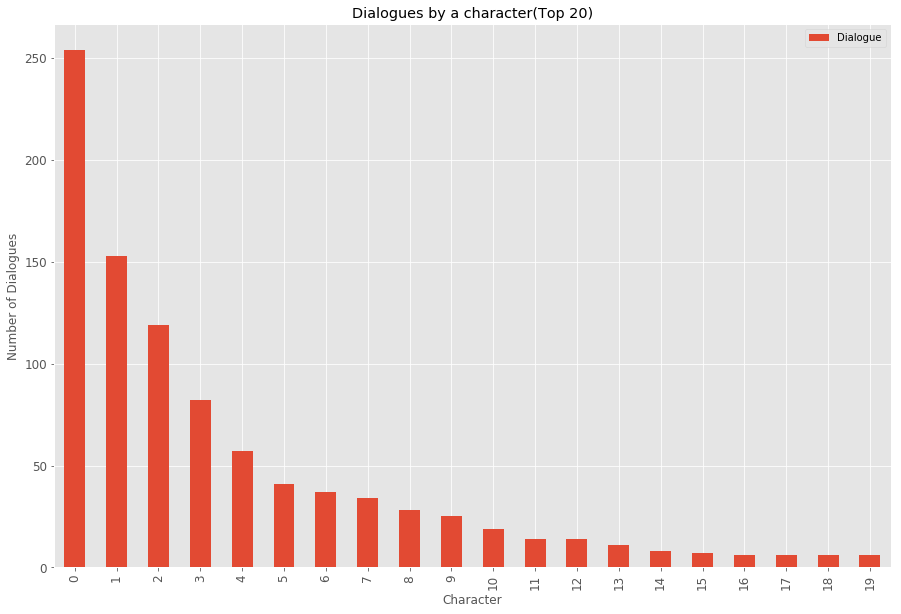

In [16]:
# Top 20 characters with more dialogues 
Top20Chars_ep4 = cleancorpus(ep4_file).character.value_counts().head(20)
print(Top20Chars_ep4)

# Visualization

df_ep4 = seriestodf(Top20Chars_ep4)
def ggplt(df_ep):
    plt.style.use('ggplot')
    ax = df_ep[['Character', 'Dialogue']].plot(kind='bar', title="Dialogues by a character(Top 20)", figsize=(15, 10),
                                               legend=True, fontsize=12)
    ax.set_xlabel("Character", fontsize=12)
    ax.set_ylabel("Number of Dialogues", fontsize=12)
    return plt.show()

ggplt(df_ep4)

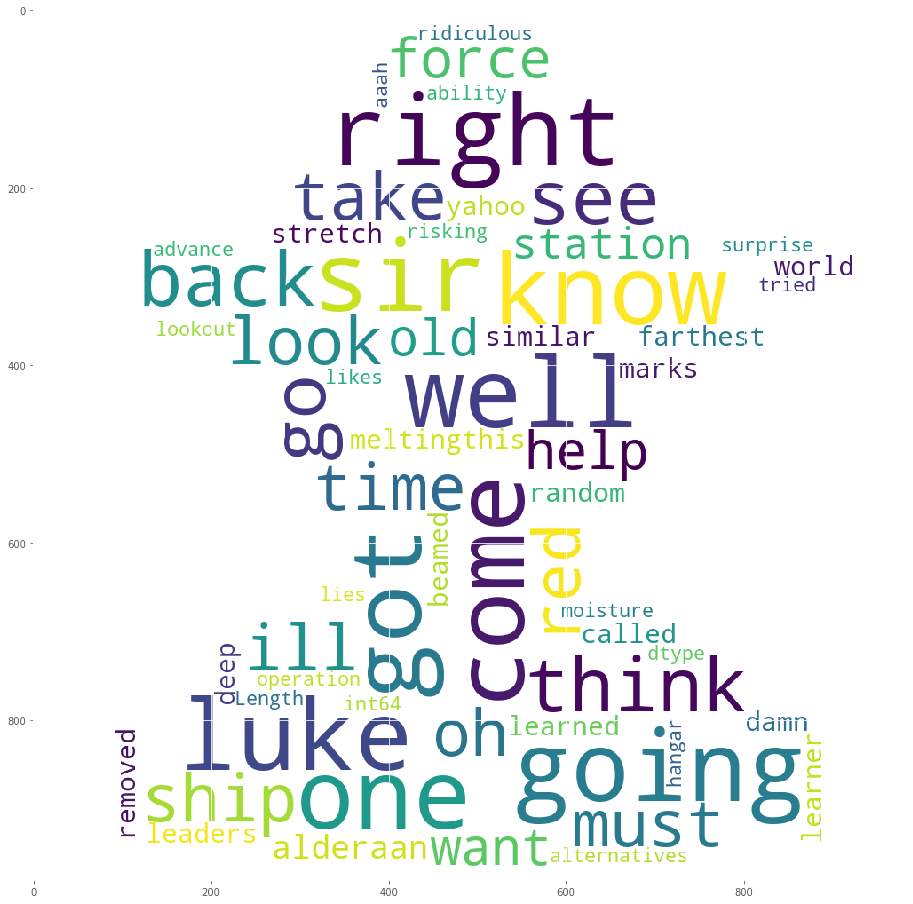

In [47]:
def wordcloud(data_file):
    d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    eiv = (get_top_n_words(cleancorpus(data_file)))
    mask = np.array(Image.open(path.join(d, 'C:\\Users\\kahma\\Downloads\\star-wars-movie-scripts'
                                        '\\star-wars-movie-scripts\\wordcloud_masks\\yoda.png')))
    eiv_wc = WordCloud(width=1000, height=1000, background_color='white', mask=mask, random_state=21,
                   max_font_size=110).generate(str(eiv))
    fig = plt.figure(figsize=(32, 16))
    plt.imshow(eiv_wc)

wordcloud(ep4_file)

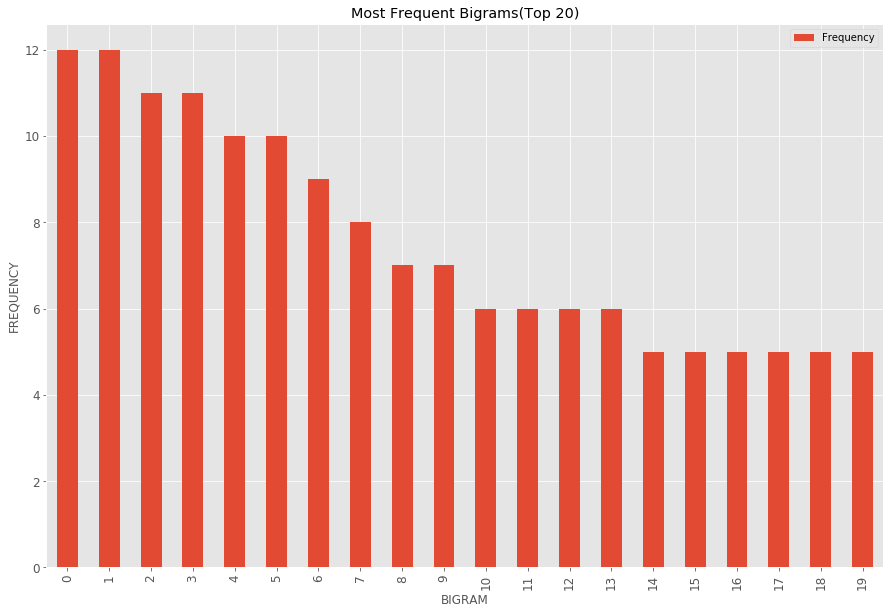

In [18]:
# Most frequent bigrams
def ggplt_biagram(df_ep_bigram):
    plt.style.use('ggplot')
    ax = df_ep_bigram[['Bigram', 'Frequency']].plot(kind='bar', title="Most Frequent Bigrams(Top 20)", figsize=(15, 10),
                                                    legend=True, fontsize=12)
    ax.set_xlabel("BIGRAM", fontsize=12)
    ax.set_ylabel("FREQUENCY", fontsize=12)
    return plt.show()


ggplt_biagram(df_ep4_bigram)

5 Episode V: The Empire Strikes Back

In [19]:
# How many dialogues?
print('Total Dialogues in Episode 5 - The Empire Strikes Back:', len(cleancorpus(ep5_file).dialogue), '\n')

Total Dialogues in Episode 5 - The Empire Strikes Back: 839 



In [20]:
# How many characters?
print('Total Characters in Episode 5 - The Empire Strikes Back:', len(cleancorpus(ep5_file).character.unique()), '\n')

Total Characters in Episode 5 - The Empire Strikes Back: 49 



HAN             182
LUKE            128
LEIA            114
THREEPIO         92
LANDO            61
VADER            56
YODA             36
PIETT            23
CREATURE         21
BEN              15
RIEEKAN          13
WEDGE             8
DECK OFFICER      7
VEERS             7
ZEV               6
EMPEROR           5
OZZEL             5
NEEDA             5
BOBA FETT         4
DACK              4
Name: character, dtype: int64


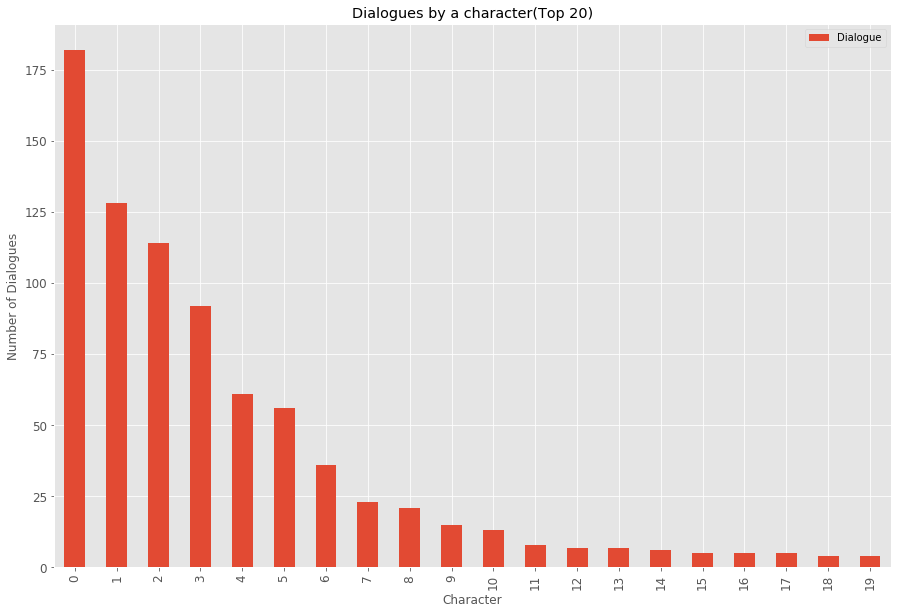

In [21]:
# Top 20 characters with more dialogues
Top20Chars_ep5 = cleancorpus(ep5_file).character.value_counts().head(20)
print(Top20Chars_ep5)

# Visualization 
ggplt(df_ep5)

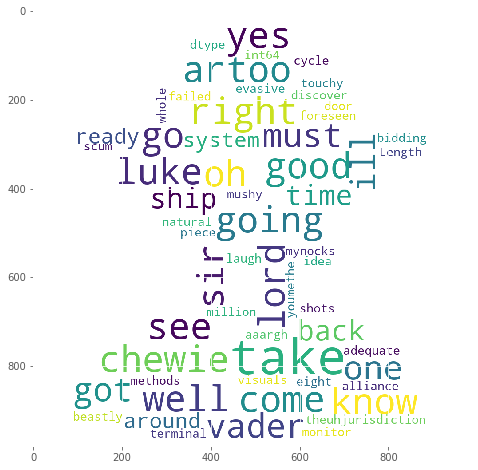

In [22]:
# Wordcloud for Episode V
wordcloud(ep5_file)

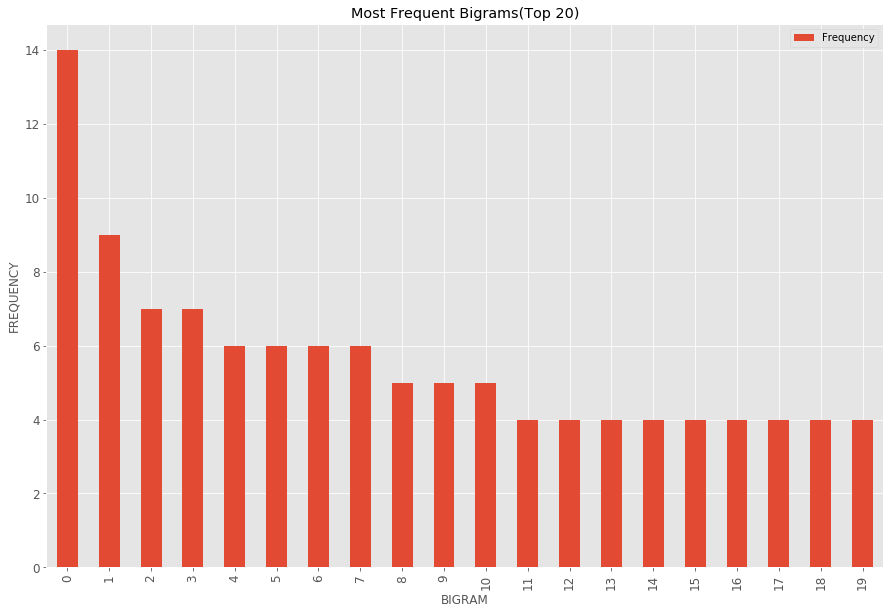

In [23]:
# Most frequent bigrams
ggplt_biagram(df_ep5_bigram)

6 Episode VI: Return of the Jedi

In [24]:
# How many dialogues?
print('Total Dialogues in Episode 6 - Return of the Jedi:', len(cleancorpus(ep6_file).dialogue), '\n')

Total Dialogues in Episode 6 - Return of the Jedi: 674 



In [25]:
# How many characters?
print('Total Characters in Episode 6 - Return of the Jedi:', len(cleancorpus(ep6_file).character.unique()), '\n')

Total Characters in Episode 6 - Return of the Jedi: 53 



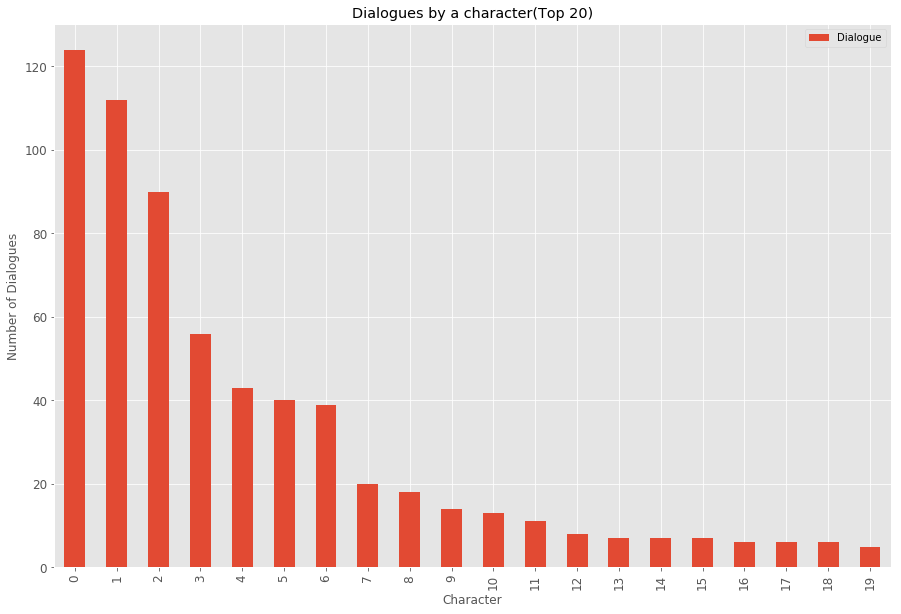

In [26]:
# Top 20 characters with more dialogues
Top20Chars_ep6 = cleancorpus(ep6_file).character.value_counts().head(20)

# Visualization
ggplt(df_ep6)

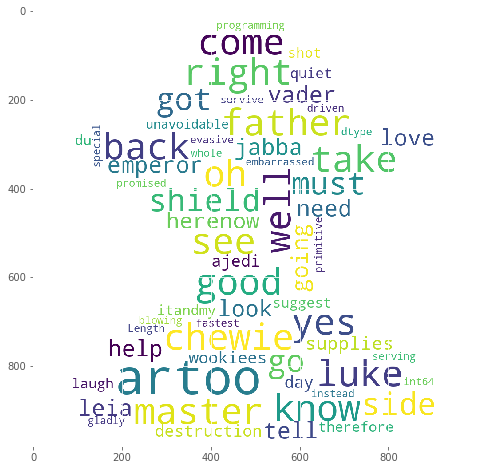

In [27]:
# Wordcloud for Episode VI
wordcloud(ep6_file)

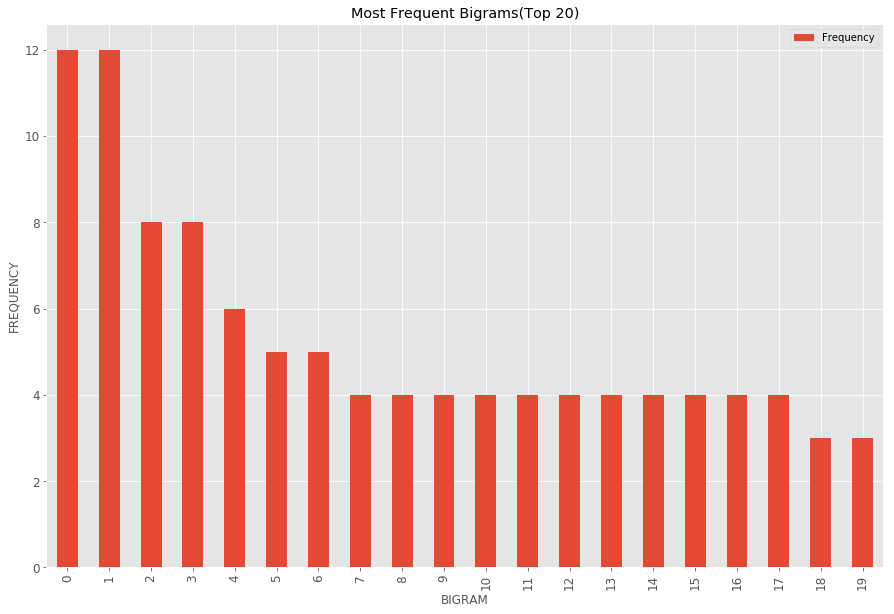

In [28]:
# Most frequent bigrams
ggplt_biagram(df_ep6_bigram)

7 The Original Trilogy

In this section we are going to compute the previous statistics, but now considering the three movies of The Original Trilogy (Episodes IV, V and VI).

In [29]:
# The Original Trilogy dialogues 
frames = [cleancorpus(ep4_file), cleancorpus(ep5_file), cleancorpus(ep6_file)]
SW_Trilogy = pd.concat(frames)
Trio = SW_Trilogy.reset_index(drop=True)


# How many dialogues?
print('Total Dialogues in Star Wars Trilogy:', len(Trio), '\n')

Total Dialogues in Star Wars Trilogy: 2523 



In [30]:
# How many characters?
print('Total Characters in Star Wars Trilogy:', len(Trio.character.unique()), '\n')

Total Characters in Star Wars Trilogy: 129 



Total Dialogues of top 20 characters in Star Wars Trilogy: 
 LUKE           494
HAN            459
THREEPIO       301
LEIA           227
VADER          140
BEN            115
LANDO          101
YODA            49
EMPEROR         44
RED LEADER      38
BIGGS           34
WEDGE           33
PIETT           31
TARKIN          28
JABBA           26
OWEN            25
CREATURE        22
TROOPER         19
ACKBAR          14
GOLD LEADER     14
Name: character, dtype: int64 



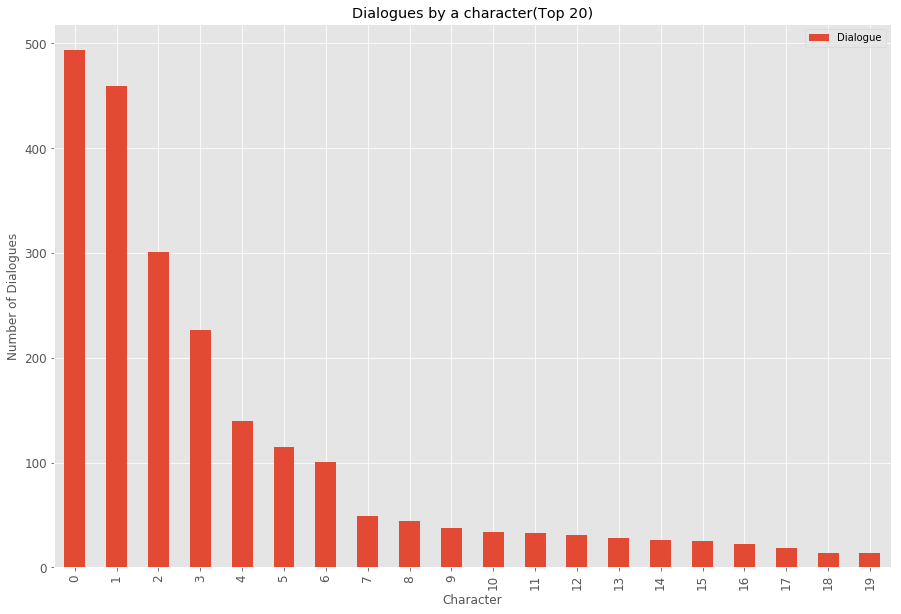

In [31]:
# Top 20 characters with more dialogues
print('Total Dialogues of top 20 characters in Star Wars Trilogy:', '\n', Trio.character.value_counts().head(20),'\n')

# Visualization
Top20Chars_trilogy = SW_Trilogy.character.value_counts().head(20)
df_trilogy = seriestodf(Top20Chars_trilogy)
ggplt(df_trilogy)

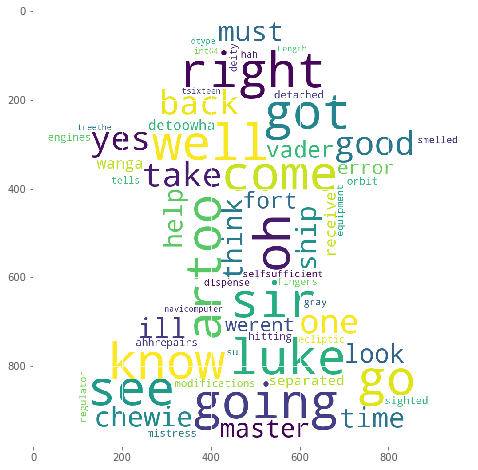

In [32]:
# Wordcloud for The Original Trilogy
dir = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
eiv4 = (get_top_n_words(Trio))
mask = np.array(Image.open(path.join(dir, 'C:\\Users\\kahma\\Downloads\\star-wars-movie-scripts\\'
                                        'star-wars-movie-scripts\\wordcloud_masks\\yoda.png')))
stop_words = set(STOPWORDS)
eiv_wc = WordCloud(width=1000, height=1000, background_color='white', mask=mask, random_state=21,
                   max_font_size=110, stopwords=stop_words).generate(str(eiv4))
fig = plt.figure(figsize=(16, 8))
plt.imshow(eiv_wc)

Most Frequent bigrams in Star Wars Trilogy: 
 lord vader        25
master luke       22
dark side         20
luke luke         16
death star        13
come back         12
r unit            12
obiwan kenobi     12
yes sir           12
battle station    12
looks like        11
rebel base        11
captain solo      11
yes lord          10
sand people       10
take care         10
oh oh             10
gold leader       10
let go            10
lets go            9
dtype: int64 



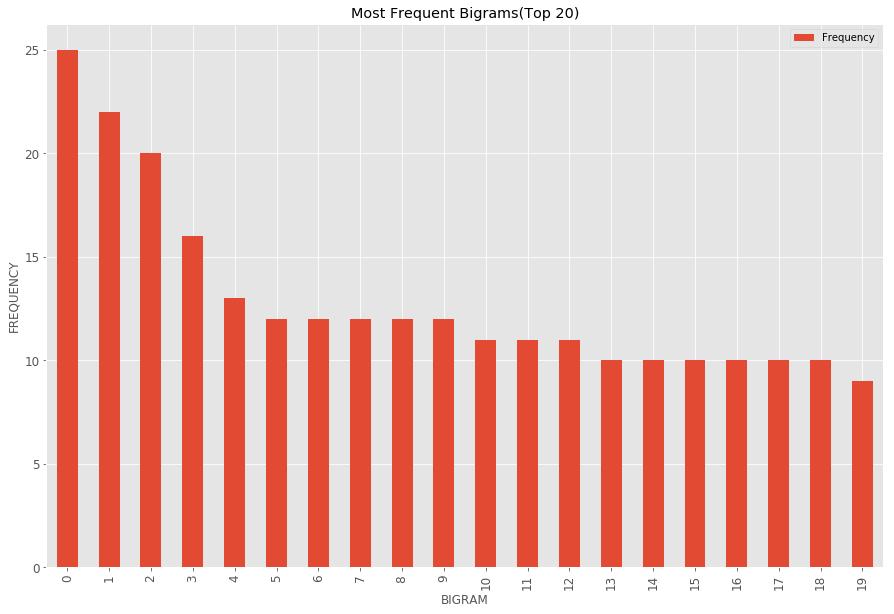

In [33]:
# Most frequent bigrams
i = SW_Trilogy.dialogue \
        .str.split(expand=True) \
        .stack()
j = i + ' ' + i.shift(-1)
trio_bigrams = j.dropna().reset_index(drop=True)

print('Most Frequent bigrams in Star Wars Trilogy:', '\n',
      most_frequent_bigrams(trio_bigrams), '\n')

df_triology = seriestodfbigram(most_frequent_bigrams(trio_bigrams))

ggplt_biagram(df_triology)

7.1 Sentiment analysis

Let’s address the topic of opinion mining or sentiment analysis. We can use the tools of text mining to approach the emotional content of text programmatically.

In [34]:
# Transform the text to a tidy data structure with one token per row
SW_Trilogy['dialogue1'] = SW_Trilogy['dialogue'].apply(word_tokenize)
dialogue_list = list(SW_Trilogy.dialogue1)
dialogue_merged = list(itertools.chain.from_iterable(dialogue_list))

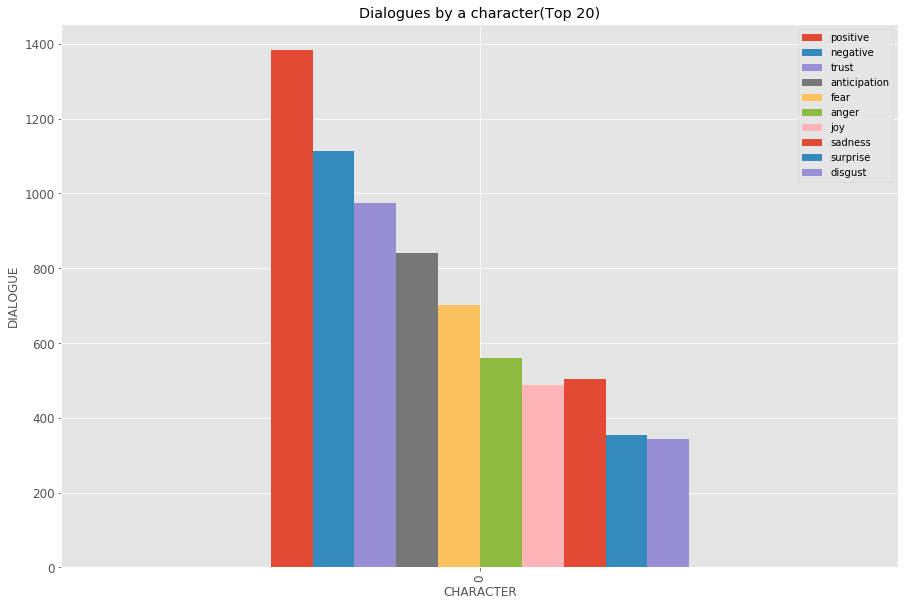

In [210]:
# Frequency of each sentiment
wordList = defaultdict(list)
emotionList = defaultdict(list)
with open('C:\\Users\\kahma\\OneDrive\\Desktop\\NRC-Sentiment-Emotion-Lexicons\\NRC-Sentiment-Emotion-Lexicons\\'
          'NRC-Emotion-Lexicon-v0.92\\NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    headerRows = [i for i in range(0, 46)]
    for row in headerRows:
        next(reader)
    for word, emotion, present in reader:
        if int(present) == 1:
            #print(word)
            wordList[word].append(emotion)
            emotionList[emotion].append(word)
            
def generate_emotion_count(string, wt):
    emoCount = Counter()
    for token in dialogue_merged:
        emoCount += Counter(wordList[token])
    return emoCount


wt = list(itertools.chain.from_iterable(dialogue_list))
emotionCounts = [generate_emotion_count(SW_Trilogy.dialogue, wt)]
dialogues = SW_Trilogy['dialogue']
emotion_df = pd.DataFrame(emotionCounts)
emotion_df = emotion_df.fillna(0)

plt.style.use('ggplot')
axs = emotion_df[['positive', 'negative', 'trust', 'anticipation',
                 'fear', 'anger', 'joy', 'sadness', 'surprise', 'disgust']] \
    .plot(kind='bar', title="Dialogues by a character(Top 20)", figsize=(15, 10), legend=True, fontsize=12)
axs.set_xlabel("CHARACTER", fontsize=12)
axs.set_ylabel("DIALOGUE", fontsize=12)
plt.show()


In [49]:
wordList = defaultdict(list)
emotionList = defaultdict(list)
with open('C:\\Users\\kahma\\OneDrive\\Desktop\\NRC-Sentiment-Emotion-Lexicons\\NRC-Sentiment-Emotion-Lexicons\\'
          'NRC-Emotion-Lexicon-v0.92\\NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    headerRows = [i for i in range(0, 46)]
    for row in headerRows:
        next(reader)
    for word, emotion, present in reader:
        if emotion == 'fear' and int(present) == 1:
            print(word)
#             wordList[word].append(emotion)
#             emotionList[emotion].append(word)
            
# def generate_emotion_count(string, wt):
#     emoCount = Counter()
#     for token in dialogue_merged:
#         emoCount += Counter(wordList[token])
#     return emoCount

abduction
abhor
abhorrent
abominable
abomination
abortion
absence
abuse
abyss
accident
accidental
accursed
accused
accuser
accusing
acrobat
adder
adjudicate
admonition
adrift
advance
adverse
adversity
afflict
affliction
affront
afraid
aftermath
aga
aggression
aggressive
aggressor
aghast
agonizing
agony
ailing
alarm
alarming
alcoholism
alertness
alerts
alien
alienation
ambulance
ambush
anaconda
anarchism
anarchist
anarchy
anathema
angina
anguish
animosity
annihilate
annihilated
annihilation
anomaly
anthrax
antichrist
antisocial
anxiety
anxious
apache
appalling
apparition
appendicitis
apprehend
apprehension
apprehensive
armament
armaments
armed
armor
armored
arraignment
arsenic
arson
artillery
asp
assail
assailant
assassin
assassinate
assassination
assault
astray
asylum
atherosclerosis
atrocity
atrophy
attack
attacking
attorney
auditor
austere
autopsy
avalanche
averse
aversion
avoid
avoidance
avoiding
awful
bacteria
bacterium
bad
badness
bailiff
bait
bale
bane
bang
banger
banish
banished

terrorist
terrorize
theft
theocratic
thief
thirteenth
thorny
thrash
threat
threaten
threatening
thresh
thrill
throb
thug
thumping
thundering
timid
timidity
toothache
torment
tornado
torrent
torture
toughness
towering
toxin
tract
tragedy
traitor
tramp
traumatic
travesty
treacherous
treachery
treason
treat
trembling
tremor
trepidation
tribulation
tribunal
trickery
troll
troublesome
tumor
tumour
tumult
tumultuous
turbulence
turbulent
turmoil
typhoon
tyrannical
tyranny
tyrant
ugliness
ulcer
ultimatum
unbridled
uncanny
uncertain
undecided
undesirable
uneasy
unemployed
unequal
unexpected
unfriendly
unhealthy
unholy
unjustifiable
unkind
unknown
unlawful
unlucky
unnatural
unrest
unruly
unsafe
unsettled
unspeakable
unstable
unsteady
unsurpassed
unthinkable
upheaval
uphill
uprising
urgency
urgent
usurped
validity
vampire
vanished
varicella
veer
vehement
vendetta
vengeful
venom
venomous
verdict
verge
vermin
vertigo
victim
victimized
vigilant
villain
villainous
violation
violence
violent
violently

In [62]:
file_nrc = r'C:\\Users\\kahma\\OneDrive\\Desktop\\NRC-Sentiment-Emotion-Lexicons\\NRC-Sentiment-Emotion-Lexicons\\NRC-Emotion-Lexicon-v0.92\\NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'
sentiment = pd.read_csv(file_nrc, delimiter='\t',header=None)
sentiment.columns = ['Word', 'Emotion', 'isPresent']
sentiment_final = sentiment[sentiment['isPresent'] == 1]
sentiment_final.head()

,Word,Emotion,isPresent
19,abacus,trust,1
23,abandon,fear,1
25,abandon,negative,1
27,abandon,sadness,1
30,abandoned,anger,1


In [64]:
sentiment_sample = sentiment_final.groupby(['Emotion']).count()
print(sentiment_sample)

              Word  isPresent
Emotion                      
anger         1247       1247
anticipation   839        839
disgust       1058       1058
fear          1476       1476
joy            689        689
negative      3324       3324
positive      2312       2312
sadness       1191       1191
surprise       534        534
trust         1231       1231


In [130]:
sentiment_words = pd.DataFrame(columns = ['Word','Emotion'])
#temp = 'abacus'
for temp in dialogue_merged:
    #if sentiment_final.Word == temp:
#print(temp,sentiment_final[['Word']],sentiment_final['Word']==temp)
    df = sentiment_final[sentiment_final['Word']==temp][['Word','Emotion']]
    sentiment_words = sentiment_words.append(df)

#print(sentiment_words.head())
        

In [131]:
sentiment_words = sentiment_words.reset_index()
#sentiment_words = sentiment_words.drop(['index'])
#print(sentiment_words.head())
#print(sentiment_words.groupby(['Emotion'])['Word'].count())
#sentiment_words = sentiment_words.groupby(['Emotion','Word']).count()#.sort_values(by=''))
#sentiment_words.columns = ['Emotion','Word','Count']
#sentiment_words = sentiment_words.reset_index()
sentiment_words.head()

,index,Word,Emotion
0,76026,main,positive
1,34490,destroyed,anger
2,34493,destroyed,fear
3,34495,destroyed,negative
4,34497,destroyed,sadness


In [415]:
sentiment_final2 = sentiment_words
sentiment_final2 = sentiment_final2.groupby(['Emotion','Word']).count()#.sort_values(by=''))
sentiment_final2 = sentiment_final2.reset_index().sort_values(by=['Emotion','index'],ascending=False)#.nlargest(10, 'index')
sentiment_final2 = sentiment_final2[sentiment_final2.Word != 'ill']
sentiment_final3 = sentiment_final2.groupby('Emotion').apply(lambda x: x.nlargest(10, 'index')).reset_index(drop=True) 

In [416]:
sentiment_final3

,Emotion,Word,index
0,anger,force,50
1,anger,attack,27
2,anger,rebel,26
3,anger,bad,24
4,anger,death,18
5,anger,blast,17
6,anger,hit,17
7,anger,battle,16
8,anger,powerful,14
9,anger,rebellion,14


In [287]:
sentiment_final3.groupby('Emotion').size().reset_index(name = 'Word')

,Emotion,Word
0,anger,10
1,anticipation,10
2,disgust,10
3,fear,10
4,joy,10
5,negative,10
6,positive,10
7,sadness,10
8,surprise,10
9,trust,10


compute the most frequent words for each sentiment.

Emotion
anger           <ggplot.facets.facet_wrap object at 0x000001D690DBBE10>
anticipation    <ggplot.facets.facet_wrap object at 0x000001D690DBBE10>
disgust         <ggplot.facets.facet_wrap object at 0x000001D690DBBE10>
fear            <ggplot.facets.facet_wrap object at 0x000001D690DBBE10>
joy             <ggplot.facets.facet_wrap object at 0x000001D690DBBE10>
negative        <ggplot.facets.facet_wrap object at 0x000001D690DBBE10>
positive        <ggplot.facets.facet_wrap object at 0x000001D690DBBE10>
sadness         <ggplot.facets.facet_wrap object at 0x000001D690DBBE10>
surprise        <ggplot.facets.facet_wrap object at 0x000001D690DBBE10>
trust           <ggplot.facets.facet_wrap object at 0x000001D690DBBE10>
dtype: object

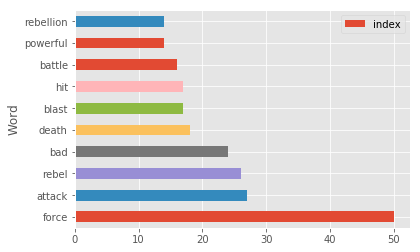

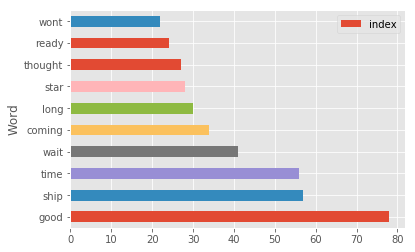

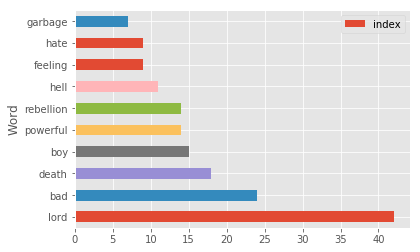

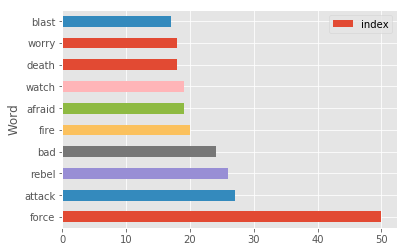

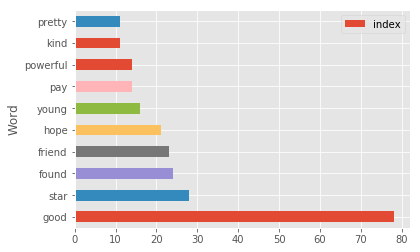

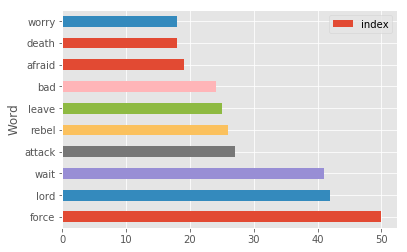

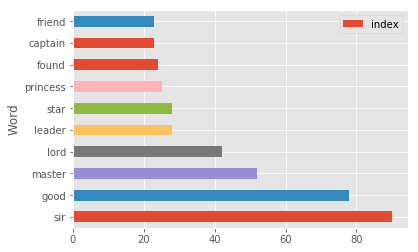

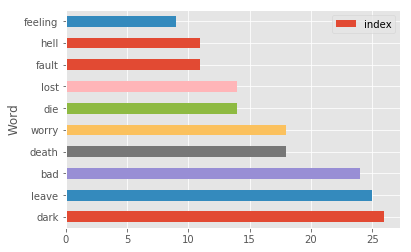

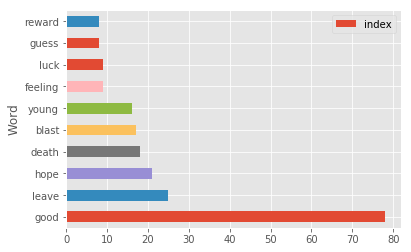

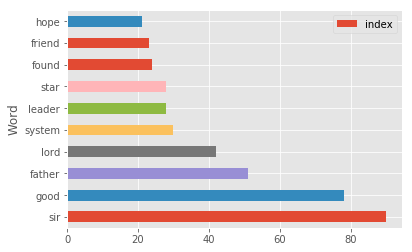

In [417]:
p = sentiment_final3.groupby('Emotion').plot(x='Word', y='index', kind = 'barh')
p + geom_bar(stat = "identity") + facet_wrap('Emotion') + coord_flip()